# Machine learning on wine

**Topics:** Text analysis, linear regression, logistic regression, text analysis, classification

**Datasets**

- **wine-reviews.csv** Wine reviews scraped from https://www.winemag.com/
- **Data dictionary:** just go [here](https://www.winemag.com/buying-guide/tenuta-dellornellaia-2007-masseto-merlot-toscana/) and look at the page

## The background

You work in the **worst newsroom in the world**, and you've had a hard few weeks at work - a couple stories killed, a few scoops stolen out from under you. It's not going well.

And because things just can't get any worse: your boss shows up, carrying a huge binder. She slams it down on your desk.

"You know some machine learning stuff, right?"

You say "no," but she isn't listening. She's giving you an assignment, the _worst assignment_:

> Machine learning is the new maps. Let's get some hits!
>
> **Do some machine learning on this stuff.**

"This stuff" is wine reviews.

## A tiny, meagre bit of help

You have a dataset. It has some stuff in it:

* **Numbers:**
    - Year published
    - Alcohol percentage
    - Price
    - Score
    - Bottle size
* **Categories:**
    - Red vs white
    - Different countries
    - Importer
    - Designation
    - Taster
    - Variety
    - Winery
* **Free text:**
    - Wine description

# Cleaning up your data

Many of these pieces - the alcohol, the year produced, the bottle size, the country the wine is from - aren't in a format you can use. Convert the ones to numbers that are numbers, and extract the others from the appropriate strings.

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [57]:
df = pd.read_csv("wine-reviews.csv")

df['price'] = df.price.str.extract("(\d+)", expand=False).dropna().astype(int)
df['year_produced'] = df.wine_name.str.extract("(\d\d\d\d)", expand=False).dropna().astype(int)
df['alcohol'] = df.alcohol.str.replace("%", "").dropna().astype(float)
df['country'] = df.appellation.str.split(", ").str.get(-1)
df['user avg rating'].str.split(" ").str.get(0).replace("Not", np.nan).value_counts()
df['bottle size'] = df['bottle size'].str.replace(" ","") \
                                     .str.replace("ml", "", case=False) \
                                     .str.replace("l","000", case=False) \
                                     .str.replace(".50", "5", regex=False) \
                                     .astype(int)
df.head(2)

,url,wine_points,wine_name,wine_desc,taster,price,designation,variety,appellation,winery,alcohol,bottle size,category,importer,date published,user avg rating,year_produced,country
0,https://www.winemag.com/buying-guide/artadi-20...,90.0,Artadi 2011 Viñas de Gain (Rioja),"Inky, minerally aromas of blackberry, black pl...",Michael Schachner,25.0,Viñas de Gain,Tempranillo,"Rioja, Northern Spain, Spain",Artadi,14.5,750,Red,Folio Fine Wine Partners,12/1/2014,Not rated yet [Add Your Review],2011.0,Spain
1,https://www.winemag.com/buying-guide/adelsheim...,90.0,Adelsheim 2012 Stoller Vineyard Chardonnay (Du...,"A tiny production wine, this is rich, tart and...",Paul Gregutt,65.0,Stoller Vineyard,Chardonnay,"Dundee Hills, Willamette Valley, Oregon, US",Adelsheim,13.5,750,White,NaN,12/1/2014,Not rated yet [Add Your Review],2012.0,US


In [67]:
df = df[df.alcohol < 25]

In [70]:
df = df[df.year_produced > 1960]

## Filtering out dirty data

Now that you've extracted some columns and converted others to numbers, you probably want to clean clean clean any thing you're using in your analysis. There are some 95% wines in there which I don't think are exactly real, and you probably don't care about wines supposedly made in 1070AD.

## What might be interesting in this dataset?

Maybe start out playing around _without_ machine learning. Here are some thoughts to get you started:

* I've heard that since the 90's wine has gone through [Parkerization](https://www.estatewinebrokers.com/blog/the-parkerization-of-wine-in-the-1990s-and-beyond/), an increase in production of high-alcohol, fruity red wines thanks to the influence of wine critic Robert Parker.
* Red and white wines taste different, obviously, but people always use [goofy words to describe them](https://winefolly.com/tutorial/40-wine-descriptions/)
* Once upon a time in 1976 [California wines proved themselves against France](https://en.wikipedia.org/wiki/Judgment_of_Paris_(wine)) and France got very angry about it

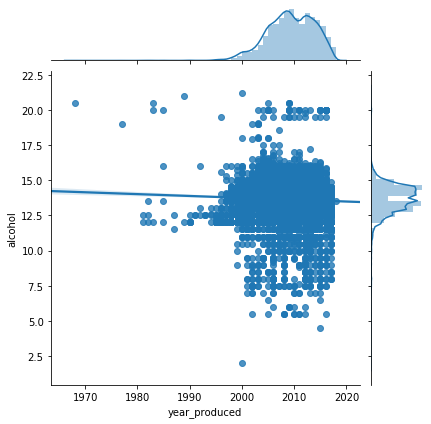

In [73]:
sns.jointplot(data=df, x='year_produced', y='alcohol', kind="reg")

## But machine learning?

Well, you can usually break machine learning down into a few different things. These aren't necessarily perfect ways of categorizing things, but eh, close enough.

* **Predicting a number**
    - Linear regression
    - How does a change in unemployment translate into a change in life expectancy?
* **Predicting a category** (aka classification)
    - Lots of algos options: logistic regression, random forest, etc
    - For example, predicting cuisines based on ingredients
* **Seeing what influences a numeric outcome**
    - Linear regression since the output is a number
    - For example, minority and poverty status on test scores 
* **Seeing what influences a categorical outcome**
    - Logistic regression since the output is a category
    - Race and car speed for if you get a waring vs ticket
    - Wet/dry pavement and car weight if you survive or not in a car crash)

We have numbers, we have categories, we have all sorts of stuff. **What are some ways we can mash them together and use machine learning?**

### Brainstorm some ideas

Use the categories above to try to come up with some ideas. Be sure to scroll up where I break down categories vs numbers vs text!

**I'll give you one idea for free:** if you don't have any ideas, start off by creating a classifier that determines whether a wine is white or red based on the wine's description.

You can also go to https://library.columbia.edu and see if you can find some academic papers about wine. I'm sure they'll inspire you! (and they might even have some ML ideas in them you can steal, too)

# Implement 2 of your machine learning ideas